## Observations and Insights 

In [202]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudy_df = pd.merge(mouse_metadata, study_results, how= "inner", on = "Mouse ID")
# Display the data table for preview
mousestudy_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [203]:
# Checking the number of mice.
micecount = mousestudy_df["Mouse ID"].count()
micecount

1893

In [204]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mousestudy_df.duplicated(subset="Mouse ID", keep='first') 

0       False
1        True
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Length: 1893, dtype: bool

In [205]:
# Optional: Get all the data for the duplicate mouse ID. 



In [206]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanMice_df = mousestudy_df.drop_duplicates("Mouse ID")
cleanMice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [207]:
# Checking the number of mice in the clean DataFrame.clea
cleanCount = cleanMice_df["Mouse ID"].count()
cleanCount

249

## Summary Statistics

In [208]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [209]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

#mean
tumorMean = round(mousestudy_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(),2)
#mediam 
tumorMedian= round(mousestudy_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(),2)
#stddev
tumorstdev = round(mousestudy_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(),2)
#variance
tumorVar = round(mousestudy_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(),2)
#SEM
tumorSEM = round(mousestudy_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem(),2)

#dataframe print our 

mousesummary_df= pd.DataFrame({"Tumor Volume Average": tumorMean,
                             "Tumor Volume Median": tumorMedian,
                             "Tumor Volume Standard Deviation": tumorstdev,
                             "Tumor Volume Variance": tumorVar,
                             "Tumor Volume SEM": tumorSEM})
mousesummary_df

,Tumor Volume Average,Tumor Volume Median,Tumor Volume Standard Deviation,Tumor Volume Variance,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,4.99,24.95,0.33
Ceftamin,52.59,51.78,6.27,39.29,0.47
Infubinol,52.88,51.82,6.57,43.13,0.49
Ketapril,55.24,53.70,8.28,68.55,0.60
Naftisol,54.33,52.51,8.13,66.17,0.60
Placebo,54.03,52.29,7.82,61.17,0.58
Propriva,52.32,50.85,6.51,42.35,0.51
Ramicane,40.22,40.67,4.85,23.49,0.32
Stelasyn,54.23,52.43,7.71,59.45,0.57


## Bar and Pie Charts

TypeError: 'str' object is not callable

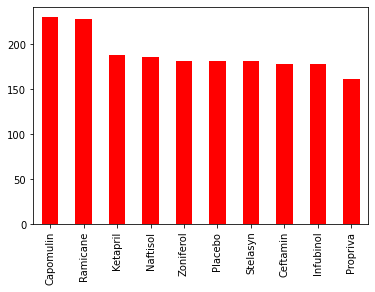

In [210]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

mouse_count = mousestudy_df["Mouse ID"].value_counts()
drug_count = mousestudy_df["Drug Regimen"].value_counts()
data_count= mouse_count.add(mouse_count, fill_value = 0)

drug_count.plot(kind = "bar", facecolor = "red", legend = False)

plt.title("Mice Tested per Drug Regimen")

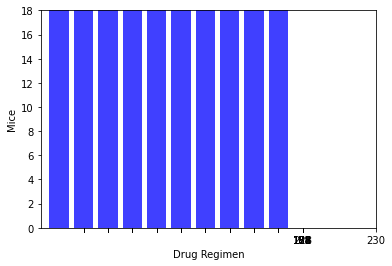

In [211]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

x_axis = np.arange(len(drug_count))
tick_locations = [value for value in x_axis]

#plt.title("Mice Tester per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")

plt.xlim(-0.75, len(drug_count)-.25)
plt.ylim(0,max(mouse_count)+ 5)

plt.bar(x_axis, drug_count, facecolor="blue", alpha = 0.75, align= "center")
plt.xticks(mouse_count , drug_count)
plt.show()

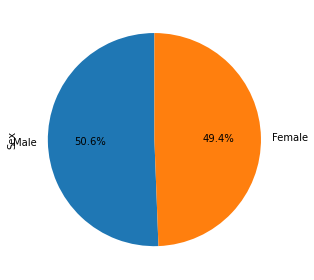

In [212]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
 # pull gender data
genderdf= mousestudy_df["Sex"].value_counts()
genderdf.plot(kind="pie", autopct = "%1.1f%%", startangle = 90, subplots = True)
plt.tight_layout()
plt.title = ("Male vs Female Mice")
plt.show()

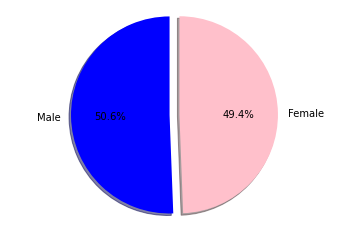

In [215]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#create graph
pyplotgender = mousestudy_df.groupby(["Sex"]).count()


Percent = [50.6, 49.4]
color = ["blue","pink"]
explode = (0.1,0)

plt.pie(Percent, explode= explode, labels=gender, colors=color, autopct ="%1.1f%%",shadow= True, startangle=90)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [183]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drugdata

In [184]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
